In [19]:
import sys
sys.path.append('../_amigocloud')
import simplekml

from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

In [20]:
def get_unidad_local():
    try:
        # ruta del archivo que contiene la información necesaria
        with open('../../unidad_local.txt', 'r') as file:
            unidad = file.readline().strip()
            return unidad
    except FileNotFoundError:
        print("El archivo 'unidad_local.txt' no se encuentra en la ruta especificada.")
    return None

def get_ruta_local():
    try:
        with open('../ruta_local.txt', 'r') as file:
            ruta = file.readline().strip()
            return ruta
    except FileNotFoundError:
        print("El archivo 'ruta_local.txt' no se encuentra en la ruta especificada.")
    return None

In [21]:
# RUTA ONEDRIVE
unidad = get_unidad_local()
ruta = get_ruta_local()
ruta_completa = os.path.join(unidad, ruta)
ruta_completa

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON'

In [22]:
# leer token
acceso = open(ruta_completa + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [27]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\SHP\SIEMBRAS.shp'
path_cat = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\SHP\CATASTRO_S13.shp'
path_puntos = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\SHP\PUNTOS_PLAN.shp'

path_plan = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\SHP\PLANIFICACION.shp'

path_kml = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\KML_PLAN'

path_xlsx_parte = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\PARTE DIARIO TRICHOGRAMMA 2025.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [28]:
ors = 1

In [29]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [30]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [31]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,"MULTIPOINT (499592.259 8095444.361, 499941.509..."
1,1530,C.I.T.T.C.A.,1,0,None,None,"MULTIPOINT (478293.650 8093934.485, 478511.932..."


In [32]:
multipoint_gdf = gdf_puntos_sem

In [33]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [34]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (499592.259 8095444.361)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (499941.509 8095901.561)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (500938.461 8096149.212)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (501294.062 8094879.209)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (501649.663 8094669.659)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (501986.213 8094263.258)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478293.650 8093934.485)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478511.932 8093664.609)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478764.610 8094136.230)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478830.756 8093951.021)


<Axes: >

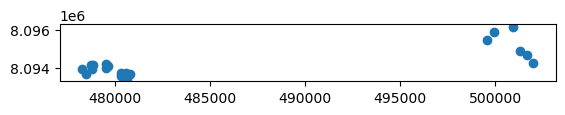

In [35]:
puntos_indi.plot()

In [36]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [37]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono de siembras
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [38]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (499592.259 8095444.361)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (499941.509 8095901.561)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (500938.461 8096149.212)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (501294.062 8094879.209)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (501649.663 8094669.659)
0,41594,AGROPECUARIA CAMPO DULCE S.R.L.,1,0,None,None,POINT (501986.213 8094263.258)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478293.650 8093934.485)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478511.932 8093664.609)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478764.610 8094136.230)
1,1530,C.I.T.T.C.A.,1,0,None,None,POINT (478830.756 8093951.021)


In [39]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [40]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [41]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
69,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L26,44.606623,-1.0,50,"POLYGON ((500070.322 8095568.798, 500053.889 8..."
72,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L29,31.407011,-1.0,50,"POLYGON ((500070.322 8095568.798, 500076.361 8..."
442,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N23,2.707825,-1.0,124,"POLYGON ((479496.561 8094203.672, 479503.064 8..."
2092,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N3,16.030289,-1.0,124,"POLYGON ((478115.791 8094316.762, 478333.064 8..."
2437,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.2,5.506842,1.0,124,"POLYGON ((479590.343 8094074.255, 479590.353 8..."
2818,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.1,1.129609,2.0,124,"POLYGON ((479590.079 8093953.204, 479589.946 8..."
2825,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C20.1,2.363191,2.0,124,"POLYGON ((480706.761 8093557.478, 480510.350 8..."
4213,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C19.1,2.349422,2.0,124,"POLYGON ((480723.119 8093681.193, 480723.119 8..."
4243,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.1,1.041685,2.0,124,"POLYGON ((478804.169 8094087.717, 478802.617 8..."
4244,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.2,5.092228,1.0,124,"POLYGON ((478805.443 8094208.279, 478805.443 8..."


In [42]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [43]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
69,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L26,44.606623,-1.0,50,"POLYGON ((500070.322 8095568.798, 500053.889 8..."
72,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L29,31.407011,-1.0,50,"POLYGON ((500070.322 8095568.798, 500076.361 8..."
442,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N23,2.707825,-1.0,124,"POLYGON ((479496.561 8094203.672, 479503.064 8..."
2092,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N3,16.030289,-1.0,124,"POLYGON ((478115.791 8094316.762, 478333.064 8..."
2437,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.2,5.506842,1.0,124,"POLYGON ((479590.343 8094074.255, 479590.353 8..."
2818,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.1,1.129609,2.0,124,"POLYGON ((479590.079 8093953.204, 479589.946 8..."
2825,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C20.1,2.363191,2.0,124,"POLYGON ((480706.761 8093557.478, 480510.350 8..."
4213,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C19.1,2.349422,2.0,124,"POLYGON ((480723.119 8093681.193, 480723.119 8..."
4243,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.1,1.041685,2.0,124,"POLYGON ((478804.169 8094087.717, 478802.617 8..."
4244,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.2,5.092228,1.0,124,"POLYGON ((478805.443 8094208.279, 478805.443 8..."


In [44]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [45]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
69,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L26,44.606623,-1.0,50,"POLYGON ((500070.322 8095568.798, 500053.889 8...",,SOLICITUD,0,,1
72,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L29,31.407011,-1.0,50,"POLYGON ((500070.322 8095568.798, 500076.361 8...",,SOLICITUD,0,,1
442,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N23,2.707825,-1.0,124,"POLYGON ((479496.561 8094203.672, 479503.064 8...",,SOLICITUD,0,,1
2092,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N3,16.030289,-1.0,124,"POLYGON ((478115.791 8094316.762, 478333.064 8...",,SOLICITUD,0,,1
2437,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.2,5.506842,1.0,124,"POLYGON ((479590.343 8094074.255, 479590.353 8...",,SOLICITUD,0,,1
2818,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.1,1.129609,2.0,124,"POLYGON ((479590.079 8093953.204, 479589.946 8...",,SOLICITUD,0,,1
2825,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C20.1,2.363191,2.0,124,"POLYGON ((480706.761 8093557.478, 480510.350 8...",,SOLICITUD,0,,1
4213,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C19.1,2.349422,2.0,124,"POLYGON ((480723.119 8093681.193, 480723.119 8...",,SOLICITUD,0,,1
4243,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.1,1.041685,2.0,124,"POLYGON ((478804.169 8094087.717, 478802.617 8...",,SOLICITUD,0,,1
4244,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.2,5.092228,1.0,124,"POLYGON ((478805.443 8094208.279, 478805.443 8...",,SOLICITUD,0,,1


In [46]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [47]:
# crea el campo soca, y coloca 0 o 1 dependiendo del origen
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [48]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [49]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca


In [50]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_44420\1203562612.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)


<Axes: >

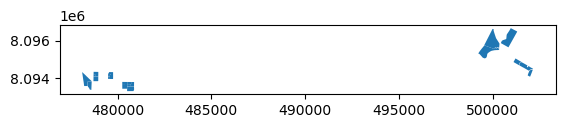

In [51]:
plan.plot()

In [52]:
plan['area'].sum()

211.83926160222998

In [53]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [54]:
plan['area'].sum()

211.8392616020627

In [55]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [56]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [57]:
last_id

0

In [58]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [59]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L26,44.606623,-1.0,50,"POLYGON ((500070.322 8095568.798, 500053.889 8...",,SOLICITUD,0,,1,NaN,1
1,30.0,CAMPO DULCE,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L29,31.407011,-1.0,50,"POLYGON ((500070.322 8095568.798, 500076.361 8...",,SOLICITUD,0,,1,NaN,2
2,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N23,2.707825,-1.0,124,"POLYGON ((479496.561 8094203.672, 479503.064 8...",,SOLICITUD,0,,1,NaN,3
3,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N3,16.030289,-1.0,124,"POLYGON ((478115.791 8094316.762, 478333.064 8...",,SOLICITUD,0,,1,NaN,4
4,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.2,5.506842,1.0,124,"POLYGON ((479590.343 8094074.255, 479590.353 8...",,SOLICITUD,0,,1,NaN,5
5,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N24.1,1.129609,2.0,124,"POLYGON ((479590.079 8093953.204, 479589.946 8...",,SOLICITUD,0,,1,NaN,6
6,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C20.1,2.363191,2.0,124,"POLYGON ((480706.761 8093557.478, 480510.350 8...",,SOLICITUD,0,,1,NaN,7
7,299.0,CITTCA,1530.0,C.I.T.T.C.A.,C19.1,2.349422,2.0,124,"POLYGON ((480723.119 8093681.193, 480723.119 8...",,SOLICITUD,0,,1,NaN,8
8,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.1,1.041685,2.0,124,"POLYGON ((478804.169 8094087.717, 478802.617 8...",,SOLICITUD,0,,1,NaN,9
9,299.0,CITTCA,1530.0,C.I.T.T.C.A.,N11.2,5.092228,1.0,124,"POLYGON ((478805.443 8094208.279, 478805.443 8...",,SOLICITUD,0,,1,NaN,10


In [60]:
len(plan)

21

In [61]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_44420\364328693.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)


In [62]:
gdf_pla_gral['area'].sum()

231.83449636646267

In [63]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [64]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [65]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,...,os,soca,id,inst,telefono_1,telefono_2,telefono_3,idd,asignado,geometry
0,29,AGROPECUARIA FLAMBOYAN,594,"AGROPECUARIA ""FLAMBOYAN""",L10,19.995235,None,SOLICITUD,0,None,...,68,123,0,50,0.0,0.0,0.0,167,None,"POLYGON ((470019.660 8092394.781, 470024.710 8..."
1,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L26,44.606623,,SOLICITUD,0,,...,1,-1,1,50,NaN,NaN,NaN,NaN,NaN,"POLYGON ((500070.322 8095568.798, 500053.889 8..."
2,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L29,31.407011,,SOLICITUD,0,,...,1,-1,2,50,NaN,NaN,NaN,NaN,NaN,"POLYGON ((500070.322 8095568.798, 500076.361 8..."
3,299,CITTCA,1530,C.I.T.T.C.A.,N23,2.707825,,SOLICITUD,0,,...,1,-1,3,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((479496.561 8094203.672, 479503.064 8..."
4,299,CITTCA,1530,C.I.T.T.C.A.,N3,16.030289,,SOLICITUD,0,,...,1,-1,4,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((478115.791 8094316.762, 478333.064 8..."
5,299,CITTCA,1530,C.I.T.T.C.A.,N24.2,5.506842,,SOLICITUD,0,,...,1,1,5,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((479590.343 8094074.255, 479590.353 8..."
6,299,CITTCA,1530,C.I.T.T.C.A.,N24.1,1.129609,,SOLICITUD,0,,...,1,2,6,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((479590.079 8093953.204, 479589.946 8..."
7,299,CITTCA,1530,C.I.T.T.C.A.,C20.1,2.363191,,SOLICITUD,0,,...,1,2,7,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((480706.761 8093557.478, 480510.350 8..."
8,299,CITTCA,1530,C.I.T.T.C.A.,C19.1,2.349422,,SOLICITUD,0,,...,1,2,8,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((480723.119 8093681.193, 480723.119 8..."
9,299,CITTCA,1530,C.I.T.T.C.A.,N11.1,1.041685,,SOLICITUD,0,,...,1,2,9,124,NaN,NaN,NaN,NaN,NaN,"POLYGON ((478804.169 8094087.717, 478802.617 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [66]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [67]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [68]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [69]:
len(gdf_pla_gral)

21

In [70]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [71]:
gdf_plan = gpd.read_file(path_plan)
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()
lista_cods = list(set(gdf_plan_sem['unidad_01']))
lista_cods

[299, 30]

284.08339123124154

[30]

In [72]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\KML_PLAN\299
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\KML_PLAN\30


# CARGAR XLSX

In [73]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [74]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [75]:
excel_data = pd.read_excel(path_xlsx_parte)

In [62]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,55,LA CONQUISTA--AGUILERA,86,AGUILERA TARADELLES JOSE LUIS,L22.1,2.484011,123,50,"MULTIPOLYGON (((-63.06421 -17.29995, -63.06617...",,SOLICITUD,0,,140,NaN,5050


In [76]:
list(gdf_pla_gral['unidad_01'])

[30,
 30,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 30,
 30,
 30,
 30,
 299,
 299,
 299]

In [77]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [78]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [79]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L26,44.606623,-1,SOLICITUD,1,1,TRICHOGRAMMA,6ml
1,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L29,31.407011,-1,SOLICITUD,2,1,TRICHOGRAMMA,6ml
2,124,1530,C.I.T.T.C.A.,299,CITTCA,N23,2.707825,-1,SOLICITUD,3,1,TRICHOGRAMMA,6ml
3,124,1530,C.I.T.T.C.A.,299,CITTCA,N3,16.030289,-1,SOLICITUD,4,1,TRICHOGRAMMA,6ml
4,124,1530,C.I.T.T.C.A.,299,CITTCA,N24.2,5.506842,1,SOLICITUD,5,1,TRICHOGRAMMA,6ml
5,124,1530,C.I.T.T.C.A.,299,CITTCA,N24.1,1.129609,2,SOLICITUD,6,1,TRICHOGRAMMA,6ml
6,124,1530,C.I.T.T.C.A.,299,CITTCA,C20.1,2.363191,2,SOLICITUD,7,1,TRICHOGRAMMA,6ml
7,124,1530,C.I.T.T.C.A.,299,CITTCA,C19.1,2.349422,2,SOLICITUD,8,1,TRICHOGRAMMA,6ml
8,124,1530,C.I.T.T.C.A.,299,CITTCA,N11.1,1.041685,2,SOLICITUD,9,1,TRICHOGRAMMA,6ml
9,124,1530,C.I.T.T.C.A.,299,CITTCA,N11.2,5.092228,1,SOLICITUD,10,1,TRICHOGRAMMA,6ml


In [80]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [81]:
final_data.to_excel(path_xlsx_parte, index=False)

In [14]:
import pandas as pd

In [15]:
path_ruta = r'G:\BISMARK\_TEMP\CITTCA_CRISOPA.shp'

In [16]:
gdf_plan = gpd.read_file(path_ruta)
lista_cods = list(set(gdf_plan['unidad_01']))

In [17]:
lista_cods

[299.0]

In [18]:
for i in lista_cods:
    prop = gdf_plan[gdf_plan['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\299.0


[299.0]

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\299.0
